In [38]:
import os
from pinscrape import pinscrape
import cv2
import matplotlib.pyplot as plt

This note book is for testing only.

This notebook is used to scrape the data frim Pinterest. And, extract the objects using opencv to use in fineturning the model. 

Download a few images from Pinterest

In [ ]:
details = pinscrape.scraper.scrape("Pixel art characters", "fdata", {})

if details["isDownloaded"]:
    print("\nDownloading completed !!")
    print(f"\nTotal urls found: {len(details['extracted_urls'])}")
    print(f"\nTotal images downloaded (including duplicate images): {len(details['url_list'])}")
    print(details)
else:
    print("\nNothing to download !!")

Funtion to show images


In [36]:

def show_rgb_image(image, title=None, conversion=cv2.COLOR_BGR2RGB):

    # Converts from one colour space to the other. this is needed as RGB
    # is not the default colour space for OpenCV
    image = cv2.cvtColor(image, conversion)

    # Show the image
    plt.imshow(image)

    # remove the axis / ticks for a clean looking image
    plt.xticks([])
    plt.yticks([])

    # if a title is provided, show it
    if title is not None:
        plt.title(title)

    plt.show()

Read  Images from Path

In [39]:
files = os.listdir('/home/fsuser/practice/stable-diffusion-webui-docker/data/config/auto/extensions/DreamArtist-sd-webui-extension/imgs/style1_pix/')

In [ ]:
for file in files:
    img = cv2.imread('/home/fsuser/practice/stable-diffusion-webui-docker/data/config/auto/extensions/DreamArtist-sd-webui-extension/imgs/style1_pix/' + file)
    # replace and save
    cv2.imwrite('/home/fsuser/practice/stable-diffusion-webui-docker/data/config/auto/extensions/DreamArtist-sd-webui-extension/imgs/style1_pix/' + file, img)

In [30]:
image = cv2.imread('/home/fsuser/practice/stable-diffusion-webui-docker/scripts/1c96fb3885181.560c0d6743ba2.jpg')
original = image.copy()

In [31]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)
dilate = cv2.dilate(close, kernel, iterations=1)

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

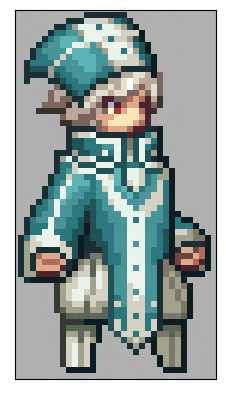

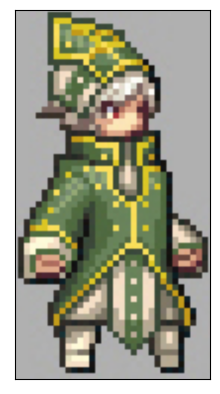

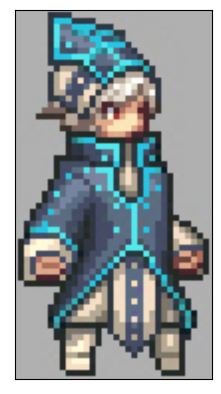

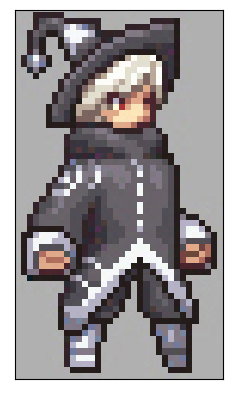

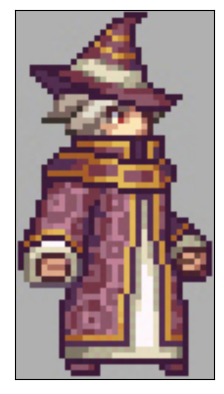

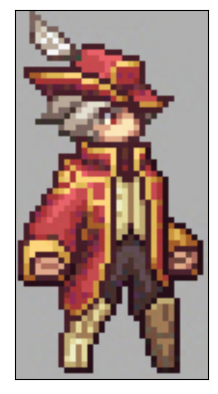

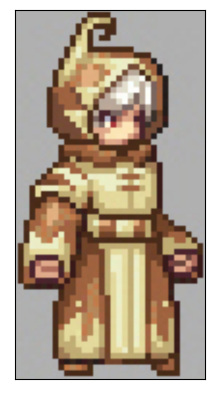

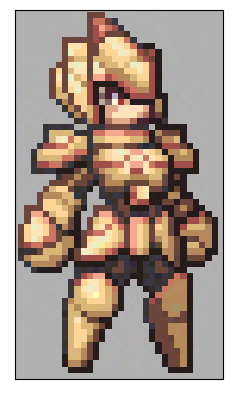

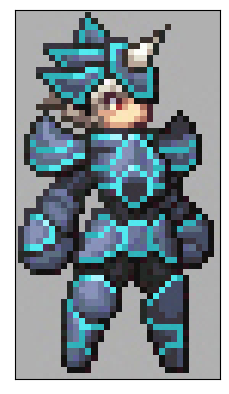

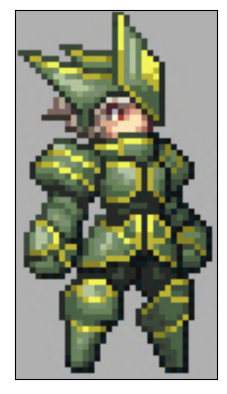

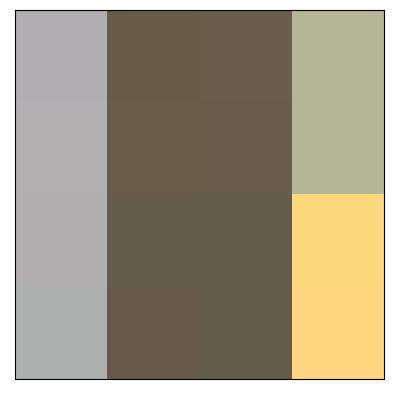

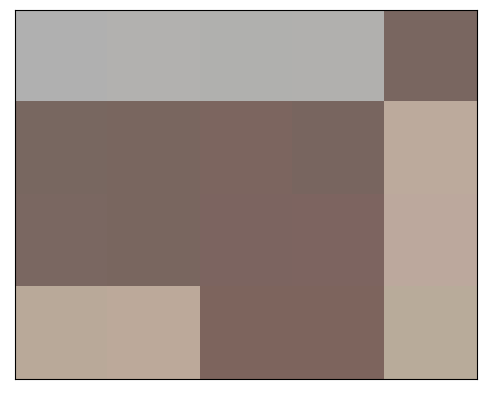

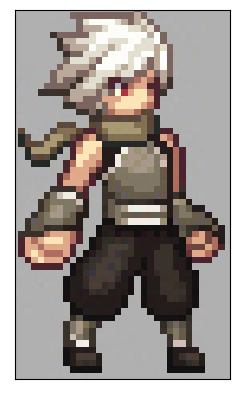

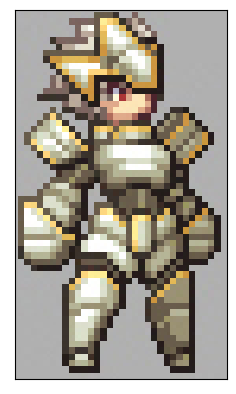

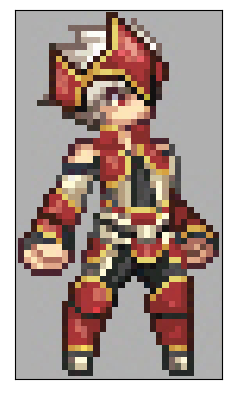

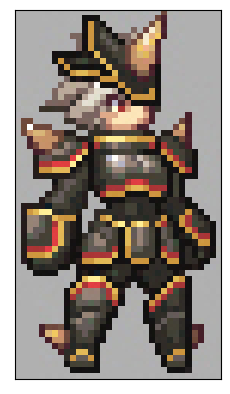

In [32]:
sprite_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    
    show_rgb_image(ROI)